<a href="https://colab.research.google.com/github/alirezanaseri548/Logistic_Regression_Project/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction for Age 30, Salary 87000 (0=No, 1=Yes):
[0]

Confusion Matrix:
[[65  3]
 [ 8 24]]

Accuracy Score: 0.89


/tmp/ipython-input-1565591310.py:52: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'blue'))(i), label=j)


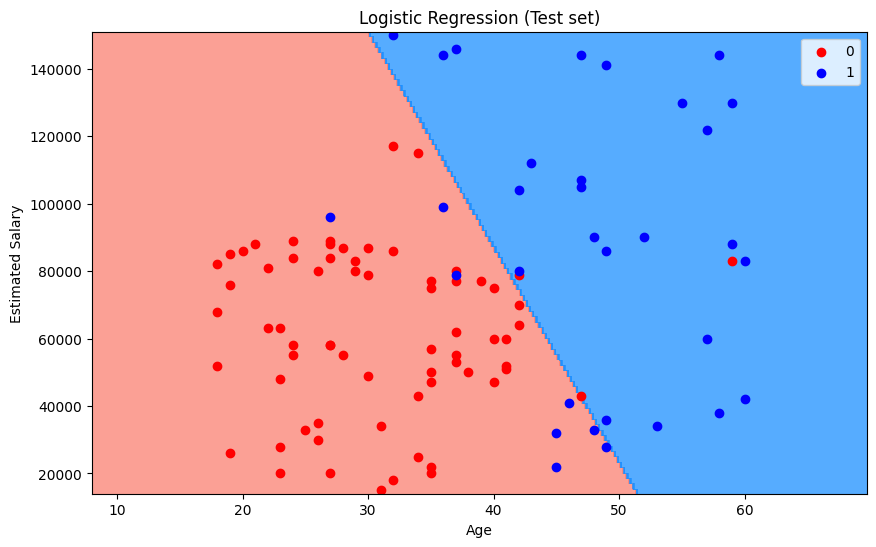

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 1. Load the dataset
dataset = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

# 2. Select only 'Age' and 'EstimatedSalary' columns (assuming they are columns 2 and 3)
X = dataset.iloc[:, [2, 3]].values  # Columns for 'Age' and 'EstimatedSalary'
y = dataset.iloc[:, -1].values   # Last column (target variable)

# 3. Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 4. Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Train the Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# 6. Predict a new result
print("Prediction for Age 30, Salary 87000 (0=No, 1=Yes):")
print(classifier.predict(sc.transform([[30, 87000]])))

# 7. Predict the Test set results
y_pred = classifier.predict(X_test)

# 8. Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)}")

# 9. Visualizing the Test set results
plt.figure(figsize=(10,6))
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
